In [44]:
from pandas import *


### Bài 1:


In [45]:
data = Series([421, 90.5, 241, 447.8, 296, 258.5, 
              452.6, 110.7, 296, 687.6, 273, 296,
              456.1, 96.4, 317, 705.7, 268,
              494.6, 81.7, 290.9, 879, 227.5,
              373.8, 102.4, 256.5, 88.8, 279.3])

print(data)


0     421.0
1      90.5
2     241.0
3     447.8
4     296.0
5     258.5
6     452.6
7     110.7
8     296.0
9     687.6
10    273.0
11    296.0
12    456.1
13     96.4
14    317.0
15    705.7
16    268.0
17    494.6
18     81.7
19    290.9
20    879.0
21    227.5
22    373.8
23    102.4
24    256.5
25     88.8
26    279.3
dtype: float64


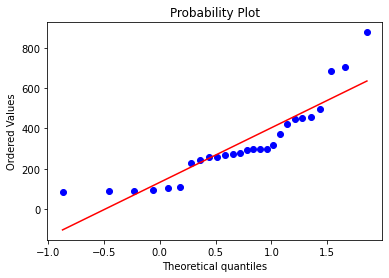

In [46]:
#Vẽ biểu đồ proplot
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
x = data
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)


In [47]:
#Kiểm tra giả thuyết trọng lượng TB là 300 gram
#Với alpha = 0.05
import statistics as sta
import scipy.stats as scipy

n = len(data)
trungbinhmau = sta.mean(data)
lechchuan = sta.stdev(data)
mu0= 300
alpha = 0.05

print("\t\tCác trường hợp kiểm định giả thuyết cho kỳ vọng.\n\nTH1: muy khác muy0 (1) \nTH2: muy < muy0 (2) \nTH3: muy > muy0 (3)")
th_kyvong = int(input("Nhập trường hợp muốn tính cho kỳ vọng: "))

if n<30 or n==30:#Mẫu nhỏ:
    if th_kyvong == 1:
        n_tudo = n-1
        t = 1-(alpha/2)
        print("t là: ",t)
        t_value = scipy.t.ppf(t,n_tudo)
        print("Giá trị thực của t là:",t_value)
        t0 = float(trungbinhmau - mu0) / (float(lechchuan)/float(math.sqrt(n)))
        print("Giá trị của t0 là:",t0)
        if t0 < -t_value or t0 > t_value:
            print("Bác bỏ Ho.")
        else:
            print("Không đủ cơ sở để bác bỏ Ho.")
            
    if th_kyvong == 2:
        n_tudo = n-1
        t = (1-alpha)
        print("t là: ",t)
        t_value = scipy.t.ppf(t,n_tudo)
        print("Giá trị thực của t là:",t_value)
        t0 = float(trungbinhmau - mu0) / (float(lechchuan)/float(math.sqrt(n)))
        print("Giá trị của t0 là:",t0)
        if t0 < -t_value :
            print("Bác bỏ Ho.")
        else:
            print("Không đủ cơ sở để bác bỏ Ho.")

    if th_kyvong == 3:
        
        n_tudo = n-1
        t = (1-alpha)
        print("t là: ",t)
        t_value = scipy.t.ppf(t,n_tudo)
        print("Giá trị thực của t là:",t_value)
        t0 = float(trungbinhmau - mu0) / (float(lechchuan)/float(math.sqrt(n)))
        print("Giá trị của t0 là:",t0)
        if t0 > t_value :
            print("Bác bỏ Ho.")
        else:
            print("Không đủ cơ sở để bác bỏ Ho.")

    





		Các trường hợp kiểm định giả thuyết cho kỳ vọng.

TH1: muy khác muy0 (1) 
TH2: muy < muy0 (2) 
TH3: muy > muy0 (3)
Nhập trường hợp muốn tính cho kỳ vọng: 3
t là:  0.95
Giá trị thực của t là: 1.7056179197592727
Giá trị của t0 là: 0.6664601918592659
Không đủ cơ sở để bác bỏ Ho.


### Bài 2:


In [55]:
data = {'Carbonate': [20.5, 28.1, 27.8, 27, 28,
                      25.2, 25.3, 27.1, 20.5, 31.3],
        'Silicate': [26.3, 24, 26.2, 20.2, 23.7,
                     34, 17.1, 26.8, 23.7, 24.9],
        'Magnetite': [29.5, 34, 27.5, 29.4, 27.9,
                     26.2, 29.9, 29.5, 30.0, 35.6],
        'Hematite': [36.5, 44.2, 34.1, 30.3, 31.4,
                     33.1, 34.1, 32.9, 36.3, 25.5]}
frame = DataFrame(data)
frame

,Carbonate,Silicate,Magnetite,Hematite
0,20.5,26.3,29.5,36.5
1,28.1,24.0,34.0,44.2
2,27.8,26.2,27.5,34.1
3,27.0,20.2,29.4,30.3
4,28.0,23.7,27.9,31.4
5,25.2,34.0,26.2,33.1
6,25.3,17.1,29.9,34.1
7,27.1,26.8,29.5,32.9
8,20.5,23.7,30.0,36.3
9,31.3,24.9,35.6,25.5


In [61]:
#Tính F-Test:
alpha = 0.01
t_value = 1-(alpha/2)
f = scipy.f.ppf(t_value, 10, 10)
print("F-Test là: ",f)



F-Test là:  5.846678425058182


In [123]:
X =  np.array(pd.DataFrame(frame).T)
X


array([[20.5, 28.1, 27.8, 27. , 28. , 25.2, 25.3, 27.1, 20.5, 31.3],
       [26.3, 24. , 26.2, 20.2, 23.7, 34. , 17.1, 26.8, 23.7, 24.9],
       [29.5, 34. , 27.5, 29.4, 27.9, 26.2, 29.9, 29.5, 30. , 35.6],
       [36.5, 44.2, 34.1, 30.3, 31.4, 33.1, 34.1, 32.9, 36.3, 25.5]])

In [124]:
a = 4
n = 10
sumX = np.sum(X) # Tổng tất cả phần tử của X
print('Tổng tất cả phần tử của X:', sumX)
meanX = np.mean(X) # Trung bình tất cả phần tử của X
print("Trung bình tất cả phần tử của X:", meanX)

Tổng tất cả phần tử của X: 1145.6000000000001
Trung bình tất cả phần tử của X: 28.640000000000004


In [126]:
SST = np.sum(X**2) - sumX**2/(a*n)
print("SST: ",SST)

SSTr = sum(np.sum(X, axis = 1)**2)/n - sumX**2/(a*n)
print("SSTr: ",SSTr)

SSE = SST - SSTr
print("SSE: ", SSE)

MSTr = SSTr/(a-1) 
MSE = SSE/(a*(n-1)) 

f0 = MSTr/MSE 
print('f0 = ', f0) 



SST:  1072.2559999999867
SSTr:  509.12199999999575
SSE:  563.1339999999909
f0 =  10.849041258386187


In [128]:
#Cách lập bảng ANOVA:

table = {'Tên đại lượng':['Treatment','Sai so','Tong'],
         'Tổng bình phương':[SSTr,SSE,SST],
         'Bậc tự do':[a-1,a*(n-1),a*n-1],
         'Trung bình bình phương':[MSTr,MSE,None],
         'F0':[f0,None,None]} 
table = pd.DataFrame(table) 
print('\nTable ANOVA:\n', table)


Table ANOVA:
   Tên đại lượng  Tổng bình phương  Bậc tự do  Trung bình bình phương  \
0     Treatment           509.122          3              169.707333   
1        Sai so           563.134         36               15.642611   
2          Tong          1072.256         39                     NaN   

          F0  
0  10.849041  
1        NaN  
2        NaN  


### Bài 3:


In [92]:
path = 'COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx'
data = pd.read_excel(path)
data1 = pd.DataFrame(data)
print(data1)


         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0     2020-06-29   29      6  2020    351      18             Afghanistan   
1     2020-06-28   28      6  2020    165      20             Afghanistan   
2     2020-06-27   27      6  2020    276       8             Afghanistan   
3     2020-06-26   26      6  2020    460      36             Afghanistan   
4     2020-06-25   25      6  2020    234      21             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
26557 2020-03-25   25      3  2020      0       0                Zimbabwe   
26558 2020-03-24   24      3  2020      0       1                Zimbabwe   
26559 2020-03-23   23      3  2020      0       0                Zimbabwe   
26560 2020-03-22   22      3  2020      1       0                Zimbabwe   
26561 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  
0        AF   

In [93]:
Afghanistan = data1[data1.countriesAndTerritories == 'Afghanistan']
Afghanistan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
167,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
168,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
169,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
170,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia


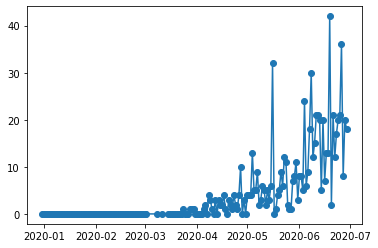

In [94]:
DMY = Afghanistan['dateRep']
Death = Afghanistan['deaths']
plt.plot_date(DMY, Death, linestyle='solid')

In [104]:
AFG = Afghanistan.deaths
print("Mean: ", AFG.mean())

Mean:  4.191860465116279


In [105]:
print("Variance: ", AFG.var())

Variance:  55.606249150006995


In [109]:
print("Standard: ", AFG.std())

Standard:  7.456959779293904


In [110]:
print("Max: ", AFG.max())

Max:  42


In [111]:
print("Min: ", AFG.min())

Min:  0


In [112]:
print("Median: ", AFG.median())

Median:  0.0


In [113]:
print("Q1: ", AFG.quantile(0.25))
print("Q2: ", AFG.quantile(0.5))
print("Q3: ", AFG.quantile(0.75))

Q1:  0.0
Q2:  0.0
Q3:  5.0


In [114]:
print("Mod: ", AFG.mode())

Mod:  0    0
dtype: int64


In [115]:
dele_colum = data1.drop('countryterritoryCode', axis = 1)
dele_colum

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14645473.0,Africa


In [116]:
dele_row = data1.drop(data1[data1.countriesAndTerritories == 'Afghanistan'].index)
dele_row

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
172,2020-06-29,29,6,2020,72,2,Albania,AL,ALB,2862427.0,Europe
173,2020-06-28,28,6,2020,61,2,Albania,AL,ALB,2862427.0,Europe
174,2020-06-27,27,6,2020,77,2,Albania,AL,ALB,2862427.0,Europe
175,2020-06-26,26,6,2020,78,2,Albania,AL,ALB,2862427.0,Europe
176,2020-06-25,25,6,2020,67,2,Albania,AL,ALB,2862427.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [117]:
QG = data1[(data1.popData2019 > 250000) & (data1.cases > 3000)]
QG

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
868,2020-06-28,28,6,2020,5287,40,Argentina,AR,ARG,44780675.0,America
871,2020-06-25,25,6,2020,4920,36,Argentina,AR,ARG,44780675.0,America
876,2020-06-20,20,6,2020,4018,50,Argentina,AR,ARG,44780675.0,America
2078,2020-06-29,29,6,2020,3809,43,Bangladesh,BD,BGD,163046173.0,Asia
2079,2020-06-28,28,6,2020,3504,34,Bangladesh,BD,BGD,163046173.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
25533,2020-03-24,24,3,2020,11236,119,United_States_of_America,US,USA,329064917.0,America
25534,2020-03-23,23,3,2020,8459,131,United_States_of_America,US,USA,329064917.0,America
25535,2020-03-22,22,3,2020,7123,80,United_States_of_America,US,USA,329064917.0,America
25536,2020-03-21,21,3,2020,5374,110,United_States_of_America,US,USA,329064917.0,America


In [118]:
Afghanistan.loc[50]['year']

2020

In [119]:
Belarus = data1[data1.countriesAndTerritories == 'Belarus']
Belarus

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2289,2020-06-29,29,6,2020,380,6,Belarus,BY,BLR,9452409.0,Europe
2290,2020-06-28,28,6,2020,382,4,Belarus,BY,BLR,9452409.0,Europe
2291,2020-06-27,27,6,2020,331,6,Belarus,BY,BLR,9452409.0,Europe
2292,2020-06-26,26,6,2020,437,5,Belarus,BY,BLR,9452409.0,Europe
2293,2020-06-25,25,6,2020,458,5,Belarus,BY,BLR,9452409.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
2458,2020-01-04,4,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2459,2020-01-03,3,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2460,2020-01-02,2,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2461,2020-01-01,1,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe


In [120]:
del_row_BLR = Belarus.iloc[3:]
del_row_BLR

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2292,2020-06-26,26,6,2020,437,5,Belarus,BY,BLR,9452409.0,Europe
2293,2020-06-25,25,6,2020,458,5,Belarus,BY,BLR,9452409.0,Europe
2294,2020-06-24,24,6,2020,464,6,Belarus,BY,BLR,9452409.0,Europe
2295,2020-06-23,23,6,2020,518,5,Belarus,BY,BLR,9452409.0,Europe
2296,2020-06-22,22,6,2020,569,3,Belarus,BY,BLR,9452409.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
2458,2020-01-04,4,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2459,2020-01-03,3,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2460,2020-01-02,2,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2461,2020-01-01,1,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe


In [121]:
Belarus = data1[data1.countriesAndTerritories == 'Belarus'][3:]
Belarus

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2292,2020-06-26,26,6,2020,437,5,Belarus,BY,BLR,9452409.0,Europe
2293,2020-06-25,25,6,2020,458,5,Belarus,BY,BLR,9452409.0,Europe
2294,2020-06-24,24,6,2020,464,6,Belarus,BY,BLR,9452409.0,Europe
2295,2020-06-23,23,6,2020,518,5,Belarus,BY,BLR,9452409.0,Europe
2296,2020-06-22,22,6,2020,569,3,Belarus,BY,BLR,9452409.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
2458,2020-01-04,4,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2459,2020-01-03,3,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2460,2020-01-02,2,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
2461,2020-01-01,1,1,2020,0,0,Belarus,BY,BLR,9452409.0,Europe
